# **TP1 Part 1: le workflow universel du machine learning**

# Context & Objectives

This TP aims to familiarize yourself with the "universal workflow of machine learning" (this expression is from Chollet et al. (2019) ). This workflow should be used as a step-by-step guideline to reach preliminary results on a new machine learning project. It is composed of the following steps:

1.   **Problem definition** : define the machine learning task based on available data, visualize and compute summary statistics on your data to better understand them ;
2.   **Dataset preparation** : perform some feature engineering if needed (such as variable selection), format your data in a way that can be fed into a machine-learning model, i.e. as a feature matrix or tensor **X**, and build a vector of labels *y* for supervised tasks, perform feature normalization and selection if needed (done in conjunction with step 3) ;
3.   **Evaluation protocol** : split **X** into a train / test partition (we remind you that the goal of this splitting is first to train a classifier by "fitting" it on the training subset, and secondly to make this trained classifier predict unseen digits from the test subset), choose performance metrics, define a cross-validation procedure, evaluate a baseline machine learning model (starting with off-the-shelf algorithms adapted to your problem and default model parameters) ;

4.   **Model evaluation** : run model training and test w.r.t the evaluation protocol, interpret performance result and re-iterate the worflow from step 2 as necessary.

In this TP, we will see how this workflow can be used to achieve first results  towards the development of these two (already existing) industrial products:

1.   The [CheckReader™](https://www.a2ia.com/en/a2ia-checkreader-0) system from the company Mitek : it is a global standard for advanced image analysis and intelligent recognition software used to seamlessly, precisely and securely process checks and other payment documentation by banks, financial institutions and other progressive corporations around the world. Here we will focus on the **recognition of handwritten digits from bank checks** ;

2.   (BONUS part) The [Faradai Platform](https://faradai.ai/?page=blog&subpage=forecasting-energy-consumption-with-ai) develops SaaS products for energy management. It has various modules to analyze energy usage or energy production ; **Energy Consumption Forecasting** is one of these tools. Forecasting is crucial for energy managers to track the success of energy conservation projects and to calculate the feasibility of energy saving investments. It is also important for energy budget managers to prepare highly accurate budgets for the next quarter or year and to procure cost-effective energy tariffs.

# 1. Digit recognition from images

For this first problem, we will be using the sklearn dataset called `load_digits`, downloaded as follows:

In [1]:
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()
print(type(digits))

<class 'sklearn.utils._bunch.Bunch'>


In [2]:
digits['images'].shape

(1797, 8, 8)

In [3]:
digits['target'].shape

(1797,)

and here is what a digit looks like:

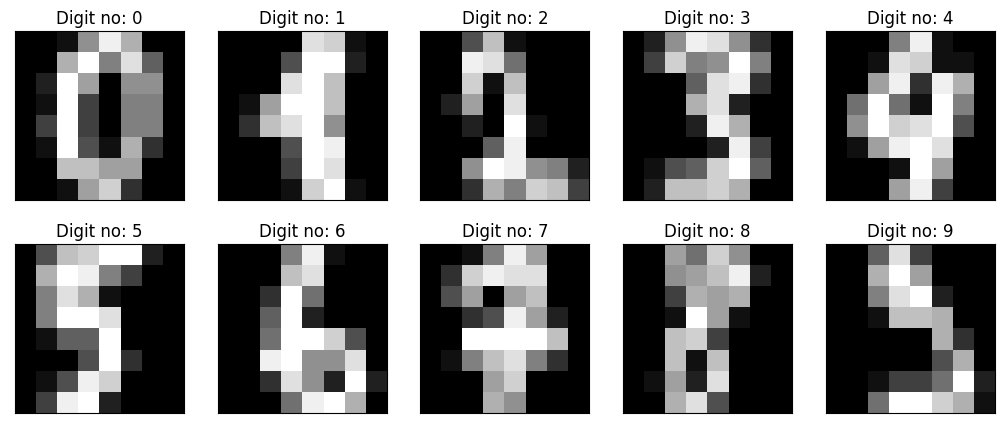

In [4]:
from matplotlib import pyplot as plt

plt.figure(1, figsize=(10,10))
plt.clf()
plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.4)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[10+i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    plt.title('Digit no: %i' %i)

The object ```digits``` is a bunch object. If this is the first time you hear about it, it is better you have a quick look to its [documentation](https://pypi.org/project/bunch/) before starting... 

## Problem definition

**Question 1.1** : please answer the following questions about the dataset:

1. what is the total number of samples in the dataset ?
2. what is the number of classes in the dataset ? and the number of samples per class ? Make comments on the balancedness of your dataset. 

Based on these information, define a machine learning task relevant to your product development.


1.1.1 : 1797

In [5]:
print(digits['target_names'])

[0 1 2 3 4 5 6 7 8 9]


1.1.2 : il y a 10 classes

array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.])

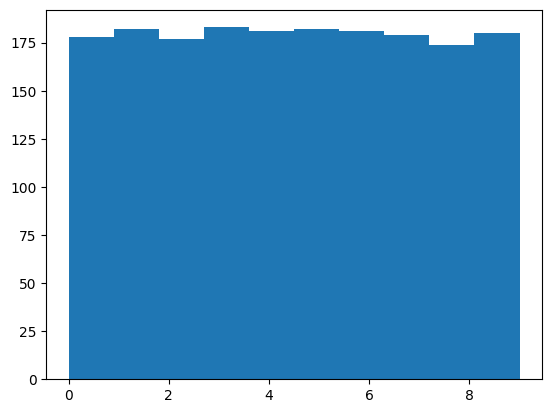

In [6]:
plt.hist(digits['target'])[0]

**Question 1.2** : please answer the following questions about the images:

1.   what is the size of an image ? 
2.   what is the type of a pixel value ? Comment.
3.   what is the image type and bit depth ? 

In [7]:
import numpy as np

print("Size of image : ", digits['images'][0, :, :].shape)
print("Type is : ", type(digits['images'][0, 0, 0]))
print("Type of image : ", type(digits['images'][0,:,:]))
print("Bit depth : ", np.amax(digits.images) - np.amin(digits.images))

Size of image :  (8, 8)
Type is :  <class 'numpy.float64'>
Type of image :  <class 'numpy.ndarray'>
Bit depth :  16.0


## Dataset preparation

**Question 1.3** : most standard machine learning algorithms impose a 2D feature matrix **X** as input data. Propose a way to build such a matrix for your dataset. In your code it will be a `np.ndarray` called `X`.

*tips: you need to flatten the image, i.e. to reshape all images in a `(total_samples, **nb_features**)` matrix, i.e. bis turning each 2-D array of grayscale values from shape (8, 8) into shape (64,).*

## Evaluation protocol

**Question 1.4** : split `X` into train and test subsets using a 80/20 % train/test ratio. `X` will then be divided into `X_train` and `X_test`, and `y` into the corresponding labels `y_train` and `y_test`. This splitting can be done with the scikit [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function. Take time to make you familiar with the different parameters of this function, especially the `stratify` parameter.

What is the size of the whole training/testing datasets and the size of each class? Comment the splitting results.

*tips : use the [Counter](https://docs.python.org/fr/3/library/collections.html#collections.Counter) class from the module collections*

**Question 1.5** : as evaluation metrics, we will use the n-class confusion matrix and the overall accuracy. This latter is defined as the sum of its diagonal elements divided by the sum of all elements.

In a code cell below, write a function `def compute_confusion_matrix(y_test, y_pred), ` where `y_pred` is the predicition by a `classifier` of some target labels `y_test`. We consider that the N classes are labelled with integers from 0 to N-1.

To help you, you can compare your function outputs with those from the sklearn function, implemented on the toy example below:

In [8]:
from sklearn import metrics

# print(metrics.accuracy_score(y_test_example,y_pred_example))

y_test_example = [0, 1, 2, 0, 1, 2, 0, 1, 2]
y_pred_example = [0, 0, 0, 0, 1, 1, 0, 2, 2]

result = metrics.confusion_matrix(y_test_example,y_pred_example)
res,ov = my_confusion_matrix(y_test_example,y_pred_example)

print('Custom confusion matrix: \n',result)
print('Sklearn confusion matrix: \n',res)

print('\n')

print('Custom confusion matrix:',ov)
print('Sklearn confusion matrix:',metrics.accuracy_score(y_test_example,y_pred_example)*100)

NameError: name 'my_confusion_matrix' is not defined

## Model evaluation

As explained in our introduction, it is good practice to start your evaluation with a simple off-the-shelf model called a baseline. Here we will use a famous classifier called [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) (weird name for a classifier, but we will clarify this in the next TP)

Let's create it and train it using the `X_train` subset. For this first TP, do not worry about it, here is how this is done using `sklearn` tools:

In [ ]:
# as we will see in TP2, LogisticRegression is quite tricky to make it optimally converge, this command line ignores warnings related to convergence problem
import warnings 
warnings.filterwarnings('ignore')

# Create a classifier: a LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#model = svm.SVC(gamma=0.001)
model.fit(X_train, y_train)

Once trained, your `model` can be directly used to predict your labels on `X_test` as follows:

In [ ]:
predicted = model.predict(X_test)

You can verify that this variable has the same shape as `y_test` so they can be directly compared:

In [ ]:
print(y_test.shape)
print(predicted.shape)

Below, you can visualize a few randomly picked images that were either correctly classified (in green) or mis-classified (in red):

In [ ]:
plt.figure(1, figsize=(10,10))
plt.clf()
plt.subplots_adjust(left=.01, right=.99, bottom=.01, top=.4)

X_test_CC = X_test[(y_test - predicted == 0)] 
predicted_CC = predicted[(y_test - predicted == 0)] 
y_test_CC = y_test[(y_test - predicted == 0)] 

X_test_MC = X_test[(y_test - predicted != 0)] 
predicted_MC = predicted[(y_test - predicted != 0)] 
y_test_MC = y_test[(y_test - predicted != 0)] 

nber_images=10

for i in range(nber_images):

    if i <nber_images/2:
      ind_test = np.random.randint(0,X_test_CC.shape[0],1)
      im = X_test_CC[ind_test,:].reshape(8,8)
      pred = predicted_CC[ind_test]
      y_t = y_test_CC[ind_test]
    else:
      ind_test = np.random.randint(0,X_test_MC.shape[0],1)
      im = X_test_MC[ind_test,:].reshape(8,8)
      pred = predicted_MC[ind_test]
      y_t = y_test_MC[ind_test]

    ax=plt.subplot(2, nber_images/2, i + 1)
    plt.imshow( im , cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
    if y_t==pred:
      ax.set_title('true: {} -> pred: {}'.format(y_t,pred), color='g')
    else:
      ax.set_title('true: {} -> pred: {}'.format(y_t,pred), color='r')

**Question 1.6** : let's now compute quantitative results on the test subset `y_test` using the n-class confusion matrix and overall accuracy implemented above. Evaluate for each class the rate of correct classification and comment the obtained results.







**Question 1.7** : perform the same operations as in Question 1.6 but now using the training subset `y_train`. Comment.



**Question 1.8** : within a `for` loop, repeat 5 times the splitting and evaluation processes (respectively from questions 1.4 and 1.6), and compute the median and standard deviation of the 5 resulting overall accuracies.  


**Question 1.9** : the operation performed in question 1.8 is called a 5-fold cross validation, implemented in `sklearn` with the methods [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) and `cross_val_score`. Reproduce your results from question 1.8 using this tool. Compare and comment the results with those of question 1.8.

**Question 1.10** : as a supplementary evaluation, apply basic transformations (e.g. negative, rotation, contrast reduction ..) to input images and see how it impacts predictive performance of the trained model. Comment some results.

# SOURCES:

*   Chollet, F. (2018) "[Deep learning with python](https://www.manning.com/books/deep-learning-with-python)", Manning Publications **(available at the library of ENSTA Bretagne)**

*   https://towardsdatascience.com/time-series-modeling-using-scikit-pandas-and-numpy-682e3b8db8d1

*   https://petebankhead.gitbooks.io/imagej-intro/content/chapters/bit_depths/bit_depths.html



# **TP1 Part 2: Energy consumption prediction from timeseries**

**Question 2.1** : for this project, we will be using the [opsd_germany_daily](https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv) dataset. You can download it using its url and the [pandas.read_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method from the `pandas` library.
As you should see your dataset has been put into a pandas `DataFrame`. The library `pandas` provides a set of open source data analysis and manipulation tool built on top of the Python programming language. `pandas` tools are widely used in data sciences, especially with time series data. So before going further, you will have to get more familiar with `pandas`, take 10 mins to go through the official [tutorial](https://pandas.pydata.org/docs/user_guide/10min.html).
## Problem definition
**Question 2.2** : please answer the following questions about the dataset:

*   how many samples contain the dataset ?
*   how many variables ? what are their names ?

**Question 2.3** : in the process of defining a machine learning problem, computing summary statistics and/or visualizing different aspects of the dataset are often very useful.

*   Compute summary statistics to describe the dataset ;

*tips: there is a pandas method doing this right away, go read the [tutorial](https://pandas.pydata.org/docs/user_guide/10min.html) again if you do not have it yet*

*   Propose a way to visualize relative variations of the consumption, wind and solar variables against time (this can be done in one line!)

*tips: after normalizing between 0 and 1 all your pandas variables, plot them against time in a same figure (all this can be done on a single code line in pandas using the function DataFrame.plot() ! )*
## Dataset preparation
**Question 2.4** : for time series data, it’s conventional to represent the time component in the index of a DataFrame. Doing this, manipulations can be performed with respect to this element.

*   What is the current index of your DataFrame ?

*   Using the method `pandas.to_datetime()`, parse the string values of `data['Date']` to timestamps ;

*   Using the method `pandas.set_index()`, set `data['Date']` as the index of the `DataFrame` ;

*   What is the dtype of `data['Date']` now ?
**Question 2.5** : as before, we have to define a feature matrix **X** and a label vector *y*.

As a first dummy baseline, we will implement the following simplistic model : one that predicts today's consumption value based on two predictive variables: 1) yesterday's consumption value and 2) difference between yesterday and the day before yesterday's consumption value.

Using only `DataFrame.loc` and `DataFrame.drop` methods, build a feature matrix `X` with these two variables, named `Yesterday` and `Yesterday_Diff`.

*tips: use the [`shift()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html) and [`diff()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html) methods*


The label vector `y` will be directly defined as the `Consumption` variable.

Be carefull to drop all the NaN values within your dataset (`DataFrame.dropna` method).
## Evaluation protocol
**Question 2.6** : to build your training and test sets, you will be using 10 years of data for training, i.e. 2006-2016, and last year's data for testing, i.e. 2017. Build the variables `X_train`, `y_train`, `X_test` and `y_test` following this protocol.
**Question 2.7** : for what concerns performance measures, we will be using the Root Mean Squared Deviation, defined as

\begin{equation}
 RMSD = \sqrt{\frac{\sum_{i=1}^{N}{\Big( x_{1,i} -x_{2,i} \Big)^2}}{N}}
\end{equation}

Create a function `def rmsd(y_true, y_pred):` implementing this metric.
## Model evaluation
**Question 2.8** : your evaluation will benchmark two machine learning models: a [Lasso linear](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) and a [KNn regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) model.

Drawing from the previous evaluation and using sklearn implementations, perform this evaluation.


# SOURCES:

*   Chollet, F. (2018) "[Deep learning with python](https://www.manning.com/books/deep-learning-with-python)", Manning Publications **(available at the library of ENSTA Bretagne)**

*   https://towardsdatascience.com/time-series-modeling-using-scikit-pandas-and-numpy-682e3b8db8d1

*   https://petebankhead.gitbooks.io/imagej-intro/content/chapters/bit_depths/bit_depths.html

